In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn


In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [58]:
data = ert.load('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_western_amphibious_DAT_no_std_filter_with_err.dat')
data.save('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_western_amphibious_DAT_no_std_filter_with_err.txt', "a b m n rhoa")

20/02/25 - 13:03:35 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [3]:
data = ert.load('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_western_amphibious_DAT_no_std_filter_with_err.txt', "a b m n rhoa" )


In [4]:
data_topo = ert.load(dir+"from_metadata/ERT_data_western_amphibious_DAT.dat")

20/06/25 - 23:51:48 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x129f3116590>)

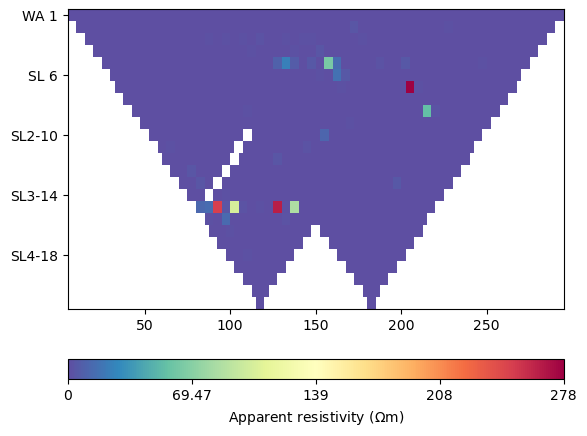

In [5]:
ert.show(data, data['err'])

20/06/25 - 23:52:34 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 7): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5908035039604939251
20/06/25 - 23:52:34 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (6.7s x 7): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\8097141831575414998


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x129b9080510>)

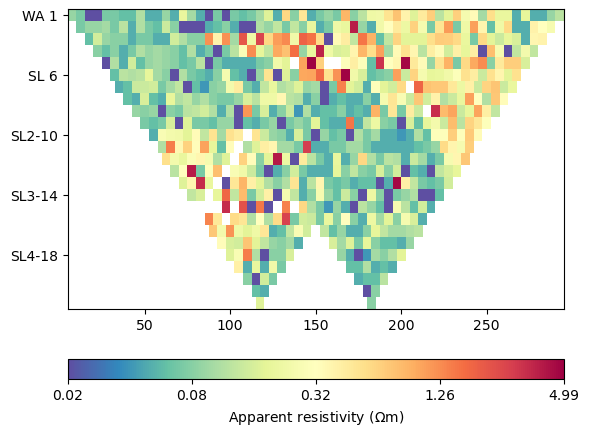

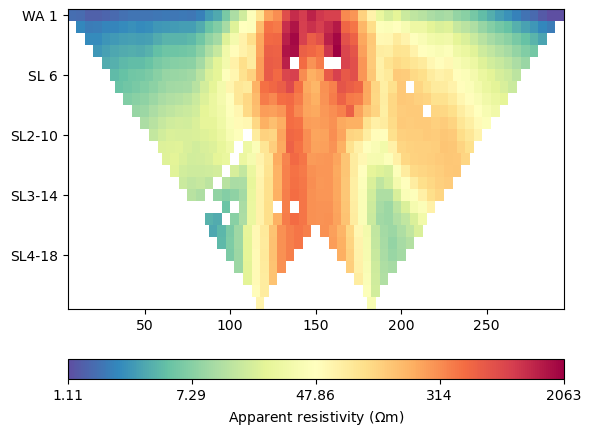

In [6]:
mgr = ert.ERTManager(data)
data['err'] = data['err'] + 0.02
data['k'] = ert.createGeometricFactors(data)
data['r'] = data['rhoa']/data['k']
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data_topo.additionalPoints(), pg.x(data)))
data['k_topo'] = ert.createGeometricFactors(data, numerical=True)
data['rhoa'] = data['r']*data['k_topo']
data.markInvalid(data['err']>=5)
#data['err'] = ert.estimateError(data, relativeError=0.04, absoluteUError=6e-5)
ert.show(data, data['err'])
ert.show(data)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1e76efc3450>)

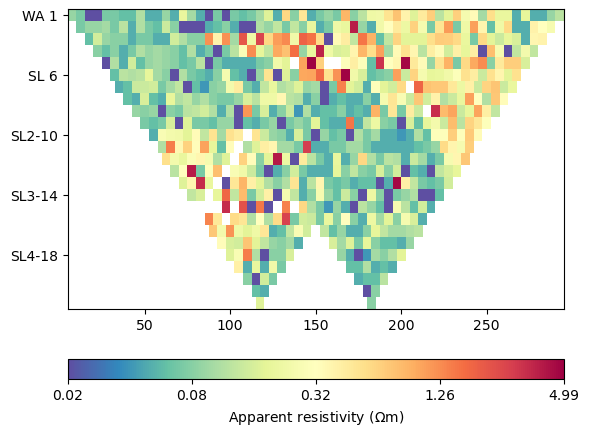

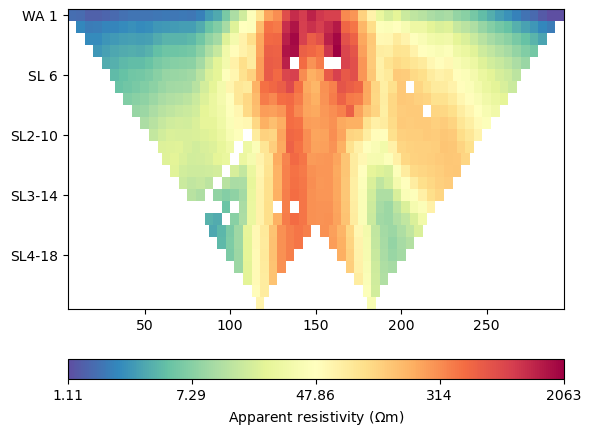

In [7]:
data.markInvalid(data['err']>=100)
ert.show(data, data['err'])
ert.show(data)

In [8]:
np.mean(data['rhoa'])

197.16214148785315

0 -10.000000000000002 -2.59586 0.0
1 -10.000000000000002 -123.26723351596546 0.0
2 304.71601495290366 -123.26723351596546 0.0
3 304.71601495290366 -5.380827534803981 0.0
4 -1188.8640598116147 -2.59586 0.0
5 -1188.8640598116147 -1299.346325792776 0.0
6 1483.5800747645183 -5.380827534803981 0.0
7 1483.5800747645183 -1302.1312933275801 0.0
8 0.0 -2.59586 0.0
9 1.2496859021261466 -2.5678395427025276 0.0
10 3.74905770637844 -2.5117986281075826 0.0
11 4.998743608504586 -2.48377817081011 0.0
12 6.248564641657222 -2.462626971748795 0.0
13 8.748206707962492 -2.420324573626165 0.0
14 9.998027741115127 -2.39917337456485 0.0
15 11.246216441744759 -2.466418321090373 0.0
16 13.742593843004023 -2.6009082141414184 0.0
17 14.990782543633655 -2.6681531606669413 0.0
18 16.240455365698615 -2.6967024029205033 0.0
19 18.739801009828536 -2.753800887427627 0.0
20 19.989473831893495 -2.782350129681189 0.0
21 21.23936230852587 -2.765781667808728 0.0
22 23.739139261790626 -2.7326447440638058 0.0
23 24.9890277384

(-50.0, 381.0)

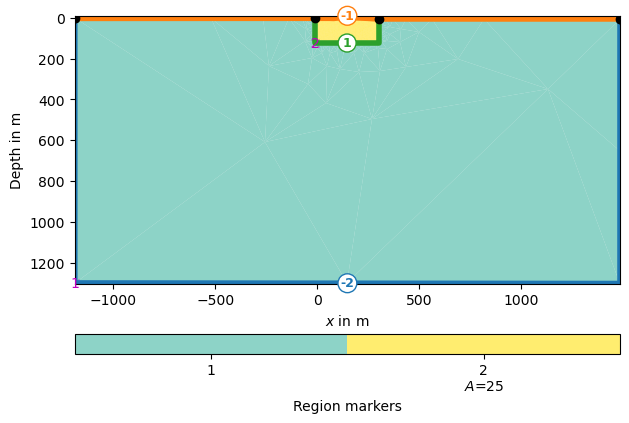

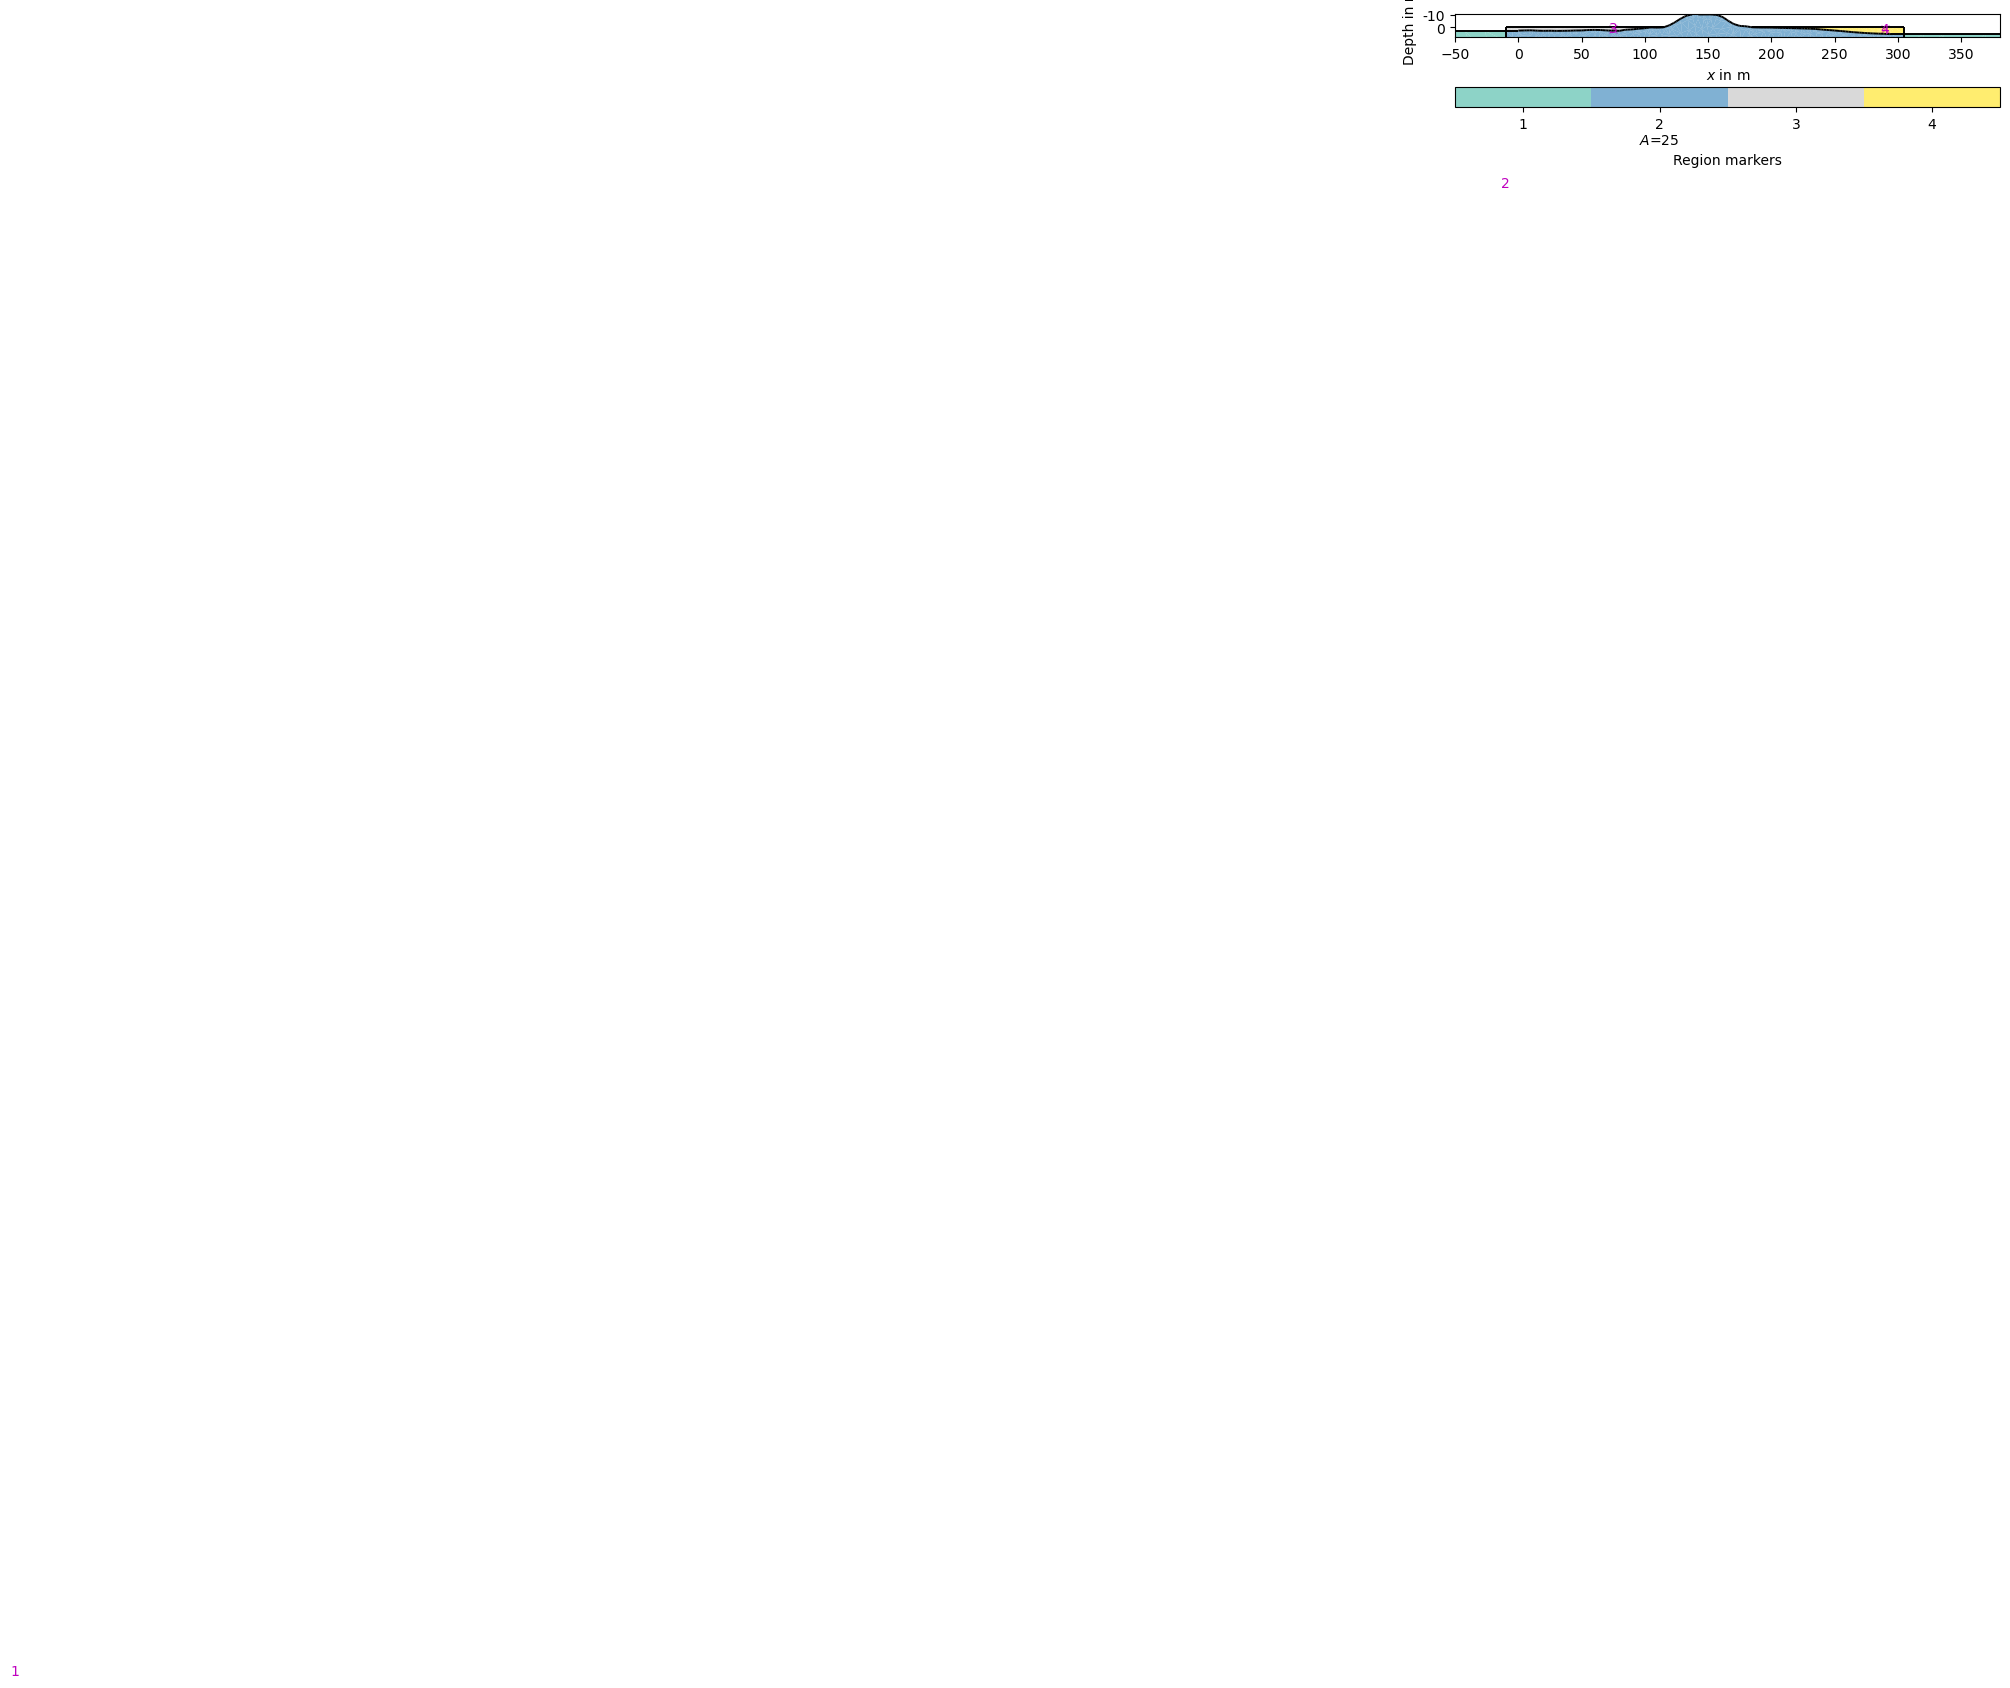

In [9]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25, paraMaxCellSize=25)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
ax, _ = pg.show(plc, markers=True)

plc.createNode(-10.000000000000002, 0, 0, marker=189)
plc.createNode(115.5, 0, 0, marker=190)
plc.createNode(185, 0, 0, marker=191)
plc.createNode(304.71601495290366, 0, 0, marker=192)

plc.createEdge(plc.node(189), plc.node(190), marker=-1)
plc.createEdge(plc.node(189), plc.node(0), marker=-1)
plc.createEdge(plc.node(191), plc.node(192), marker=-1)
plc.createEdge(plc.node(192), plc.node(3), marker=-1)

plc.addRegionMarker([75, -1], marker=3)  
plc.addRegionMarker([290, -1.5], marker=4)  

ax, _ = pg.show(plc, showMesh=True)
ax.set_ylim(-8)
ax.set_xlim(-50,381)



0 -10.000000000000002 -2.59586 0.0
1 -10.000000000000002 -123.26723351596546 0.0
2 304.71601495290366 -123.26723351596546 0.0
3 304.71601495290366 -5.380827534803981 0.0
4 -1188.8640598116147 -2.59586 0.0
5 -1188.8640598116147 -1299.346325792776 0.0
6 1483.5800747645183 -5.380827534803981 0.0
7 1483.5800747645183 -1302.1312933275801 0.0
8 0.0 -2.59586 0.0
9 1.2496859021261466 -2.5678395427025276 0.0
10 3.74905770637844 -2.5117986281075826 0.0
11 4.998743608504586 -2.48377817081011 0.0
12 6.248564641657222 -2.462626971748795 0.0
13 8.748206707962492 -2.420324573626165 0.0
14 9.998027741115127 -2.39917337456485 0.0
15 11.246216441744759 -2.466418321090373 0.0
16 13.742593843004023 -2.6009082141414184 0.0
17 14.990782543633655 -2.6681531606669413 0.0
18 16.240455365698615 -2.6967024029205033 0.0
19 18.739801009828536 -2.753800887427627 0.0
20 19.989473831893495 -2.782350129681189 0.0
21 21.23936230852587 -2.765781667808728 0.0
22 23.739139261790626 -2.7326447440638058 0.0
23 24.9890277384

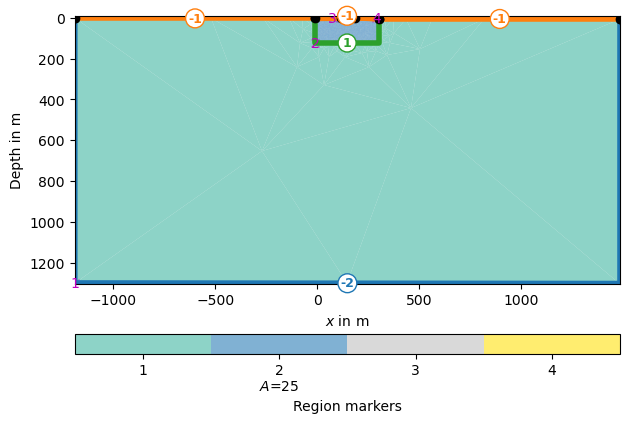

In [10]:
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
ax, _ = pg.show(plc, markers=True)

(-130.0, 381.0)

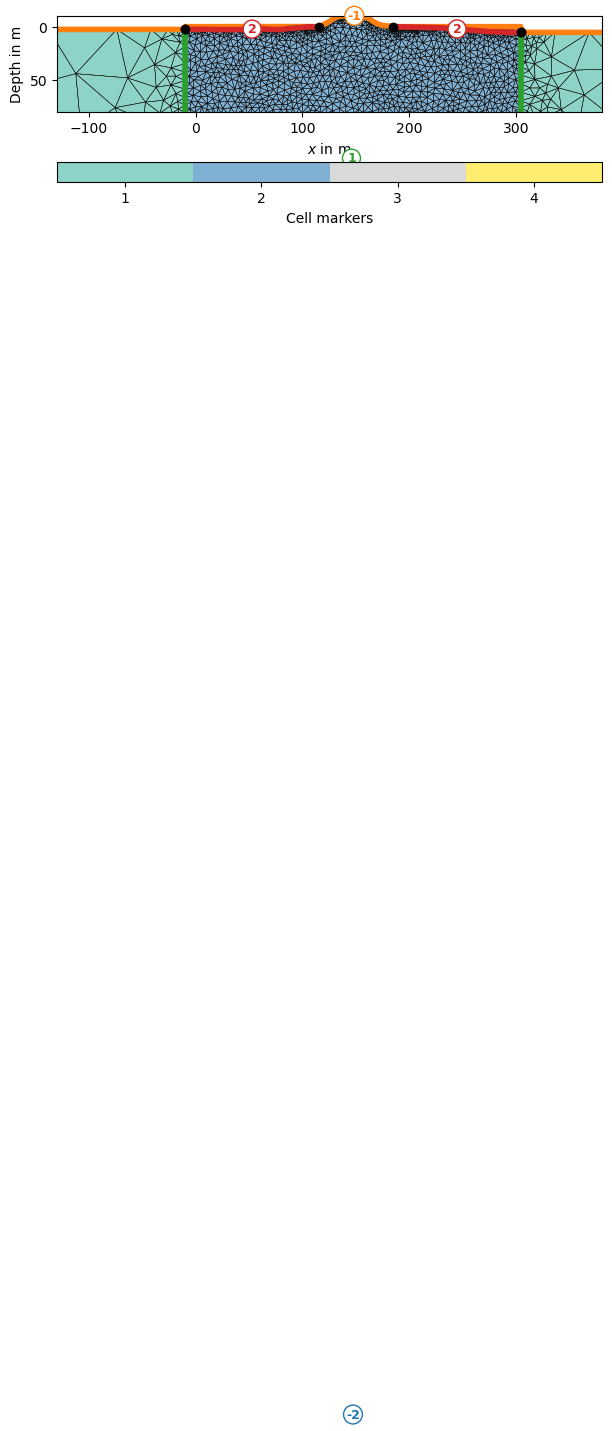

In [11]:
mesh = mt.createMesh(plc)
for b in mesh.boundaries():
    if b.marker() == -1 and not b.outside():
        b.setMarker(2)

#print(mesh)
ax, _ = pg.show(mesh, markers=True, showMesh=True)
ax.set_ylim(-80)
ax.set_xlim(-130,381)

In [12]:
data
data['k_new'] = ert.createGeometricFactors(data, mesh=mesh, numerical=True)
data['rhoa'] = (data['r'])*data['k_new']

11/05/25 - 18:23:57 - pyGIMLi - INFO - Save RVector binary
11/05/25 - 18:23:57 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\7639659822440506751


21/02/25 - 09:53:53 - pyGIMLi - INFO - Found 4 regions.
21/02/25 - 09:53:53 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/25 - 09:53:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/02/25 - 09:53:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/02/25 - 09:53:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 9984 Cells: 19068 Boundaries: 14750
21/02/25 - 09:53:55 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 09:53:55 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 09:53:55 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB27A0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB28F0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  162.91 (dPhi = 76.76%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   27.26 (dPhi = 64.92%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

21/02/25 - 09:59:51 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 09:59:51 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 09:59:51 - pyGIMLi - INFO - Starting inversion.


chi² =   27.47 (dPhi = 6.77%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   25.68 (dPhi = 0.50%) lam: 1000.0
################################################################################
#                 Abort criterion reached: dPhi = 0.5 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB0F20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB26C0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... c

21/02/25 - 10:06:29 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 10:06:29 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 10:06:29 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1070>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB0F20>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  164.42 (dPhi = 77.33%) lam: 639.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.33 (dPhi = 69.77%) lam: 639.9
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   21.81 (dPhi = 13.78%) lam: 6

21/02/25 - 10:14:30 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 10:14:30 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 10:14:30 - pyGIMLi - INFO - Starting inversion.


chi² =   19.53 (dPhi = 1.12%) lam: 639.9
################################################################################
#                Abort criterion reached: dPhi = 1.12 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1700>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2C70>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB26C0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  165.85 (dPhi = 77.41%

21/02/25 - 10:24:27 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 10:24:27 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 10:24:27 - pyGIMLi - INFO - Starting inversion.


chi² =   19.28 (dPhi = 18.61%) lam: 511.9
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   17.22 (dPhi = 1.40%) lam: 511.9
################################################################################
#                 Abort criterion reached: dPhi = 1.4 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1700>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2C70>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB26C0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... ch

21/02/25 - 10:30:38 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 10:30:38 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 10:30:38 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1700>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2C70>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  168.26 (dPhi = 77.54%) lam: 327.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   27.78 (dPhi = 74.00%) lam: 327.6
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   14.69 (dPhi = 31.12%) lam: 3

21/02/25 - 10:36:56 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 10:36:56 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 10:36:56 - pyGIMLi - INFO - Starting inversion.


chi² =   13.45 (dPhi = 1.75%) lam: 327.6
################################################################################
#                Abort criterion reached: dPhi = 1.75 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1070>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB28F0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  170.35 (dPhi = 77.43%

21/02/25 - 10:45:03 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 10:45:03 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 10:45:03 - pyGIMLi - INFO - Starting inversion.


chi² =   11.65 (dPhi = 0.21%) lam: 262.0
################################################################################
#                Abort criterion reached: dPhi = 0.21 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1070>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB28F0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  171.68 (dPhi = 77.41%

21/02/25 - 10:51:40 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 10:51:40 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 10:51:40 - pyGIMLi - INFO - Starting inversion.


chi² =   10.38 (dPhi = 2.54%) lam: 209.6
--------------------------------------------------------------------------------
inv.iter 5 ... chi² =   10.29 (dPhi = 0.24%) lam: 209.6
################################################################################
#                Abort criterion reached: dPhi = 0.24 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1070>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB28F0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi

21/02/25 - 11:00:16 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 11:00:16 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:00:16 - pyGIMLi - INFO - Starting inversion.


chi² =    9.24 (dPhi = 3.31%) lam: 167.7
--------------------------------------------------------------------------------
inv.iter 5 ... chi² =    9.16 (dPhi = 0.40%) lam: 167.7
################################################################################
#                 Abort criterion reached: dPhi = 0.4 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1070>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB28F0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi

21/02/25 - 11:06:25 - pyGIMLi - INFO - Use median(data values)=75.56380552127132


chi² =    8.23 (dPhi = 0.78%) lam: 134.1
################################################################################
#                Abort criterion reached: dPhi = 0.78 (< 2.0%)                 #
################################################################################


21/02/25 - 11:06:25 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:06:25 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB26C0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1070>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  180.77 (dPhi = 76.55%) lam: 107.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   35.61 (dPhi = 77.00%) lam: 107.3
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.70 (dPhi = 58.64%) lam: 1

21/02/25 - 11:12:46 - pyGIMLi - INFO - Use median(data values)=75.56380552127132


chi² =    7.47 (dPhi = 1.44%) lam: 107.3
################################################################################
#                Abort criterion reached: dPhi = 1.44 (< 2.0%)                 #
################################################################################


21/02/25 - 11:12:46 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:12:47 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  184.25 (dPhi = 76.19%) lam: 85.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   37.14 (dPhi = 77.26%) lam: 85.8
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.42 (dPhi = 62.44%) lam: 85.

21/02/25 - 11:22:28 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 11:22:28 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:22:28 - pyGIMLi - INFO - Starting inversion.


chi² =    6.43 (dPhi = -0.01%) lam: 85.8
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2EA0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2AB0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  189.70 (dPhi = 75.55%

21/02/25 - 11:29:59 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 11:29:59 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:29:59 - pyGIMLi - INFO - Starting inversion.


chi² =    5.81 (dPhi = -0.01%) lam: 68.7
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2EA0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2AB0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  194.46 (dPhi = 75.02%

21/02/25 - 11:36:47 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 11:36:47 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:36:47 - pyGIMLi - INFO - Starting inversion.


chi² =    5.27 (dPhi = -0.01%) lam: 54.9
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2EA0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2AB0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  199.89 (dPhi = 74.39%

21/02/25 - 11:44:06 - pyGIMLi - INFO - Use median(data values)=75.56380552127132


chi² =    4.82 (dPhi = 1.95%) lam: 43.9
################################################################################
#                Abort criterion reached: dPhi = 1.95 (< 2.0%)                 #
################################################################################


21/02/25 - 11:44:06 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:44:06 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2EA0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2AB0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  205.72 (dPhi = 73.70%) lam: 35.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   41.91 (dPhi = 78.71%) lam: 35.1
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.24 (dPhi = 72.56%) lam: 35.

21/02/25 - 11:51:28 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 11:51:28 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 11:51:28 - pyGIMLi - INFO - Starting inversion.


chi² =    4.54 (dPhi = 15.80%) lam: 35.1
--------------------------------------------------------------------------------
inv.iter 6 ... chi² =    4.46 (dPhi = 0.97%) lam: 35.1
################################################################################
#                Abort criterion reached: dPhi = 0.97 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB18C0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi²

21/02/25 - 12:00:19 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:00:19 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:00:19 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB28F0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2EA0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1700>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  218.01 (dPhi = 72.23%) lam: 22.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   43.23 (dPhi = 79.60%) lam: 22.5
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    7.94 (dPhi = 75.92%) lam: 22.

21/02/25 - 12:09:52 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:09:52 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:09:52 - pyGIMLi - INFO - Starting inversion.


chi² =    3.94 (dPhi = 0.04%) lam: 22.5
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  224.04 (dPhi = 71.51%)

21/02/25 - 12:17:14 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:17:14 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:17:14 - pyGIMLi - INFO - Starting inversion.


chi² =    3.75 (dPhi = 0.02%) lam: 18.0
################################################################################
#                Abort criterion reached: dPhi = 0.02 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  229.85 (dPhi = 70.80%)

21/02/25 - 12:24:59 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:24:59 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:24:59 - pyGIMLi - INFO - Starting inversion.


chi² =    3.62 (dPhi = 0.17%) lam: 14.4
################################################################################
#                Abort criterion reached: dPhi = 0.17 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  233.64 (dPhi = 70.36%)

21/02/25 - 12:34:50 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:34:50 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:34:50 - pyGIMLi - INFO - Starting inversion.


chi² =    3.41 (dPhi = 0.17%) lam: 11.5
################################################################################
#                Abort criterion reached: dPhi = 0.17 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB1690>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  238.14 (dPhi = 69.81%)

21/02/25 - 12:42:51 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:42:51 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:42:51 - pyGIMLi - INFO - Starting inversion.


chi² =    3.25 (dPhi = 0.13%) lam: 9.2
################################################################################
#                Abort criterion reached: dPhi = 0.13 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  242.29 (dPhi = 69.31%) 

21/02/25 - 12:50:37 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:50:37 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:50:37 - pyGIMLi - INFO - Starting inversion.


chi² =    3.16 (dPhi = 0.35%) lam: 7.4
################################################################################
#                Abort criterion reached: dPhi = 0.35 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  247.54 (dPhi = 68.66%) 

21/02/25 - 12:58:10 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 12:58:10 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 12:58:10 - pyGIMLi - INFO - Starting inversion.


chi² =    3.19 (dPhi = 0.82%) lam: 5.9
################################################################################
#                Abort criterion reached: dPhi = 0.82 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  250.82 (dPhi = 68.26%) 

21/02/25 - 13:06:23 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 13:06:23 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 13:06:23 - pyGIMLi - INFO - Starting inversion.


chi² =    2.99 (dPhi = 0.02%) lam: 4.7
################################################################################
#                Abort criterion reached: dPhi = 0.02 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  254.80 (dPhi = 67.77%) 

21/02/25 - 13:13:51 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 13:13:51 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 13:13:51 - pyGIMLi - INFO - Starting inversion.


chi² =    2.92 (dPhi = -0.01%) lam: 3.8
################################################################################
#                Abort criterion reached: dPhi = -0.01 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  257.70 (dPhi = 67.42%)

21/02/25 - 13:21:23 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 13:21:23 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 13:21:23 - pyGIMLi - INFO - Starting inversion.


chi² =    2.91 (dPhi = 11.63%) lam: 3.0
--------------------------------------------------------------------------------
inv.iter 9 ... chi² =    2.89 (dPhi = 0.31%) lam: 3.0
################################################################################
#                Abort criterion reached: dPhi = 0.31 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB28F0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =

21/02/25 - 13:28:53 - pyGIMLi - INFO - Use median(data values)=75.56380552127132
21/02/25 - 13:28:53 - pyGIMLi - INFO - Created startmodel from forward operator: 4326, min/max=75.563806/75.563806
21/02/25 - 13:28:53 - pyGIMLi - INFO - Starting inversion.


chi² =    2.89 (dPhi = 1.08%) lam: 2.4
################################################################################
#                Abort criterion reached: dPhi = 1.08 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189C7607650>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189C5317A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2B20>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB2960>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB29D0>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  261.81 (dPhi = 66.92%) 

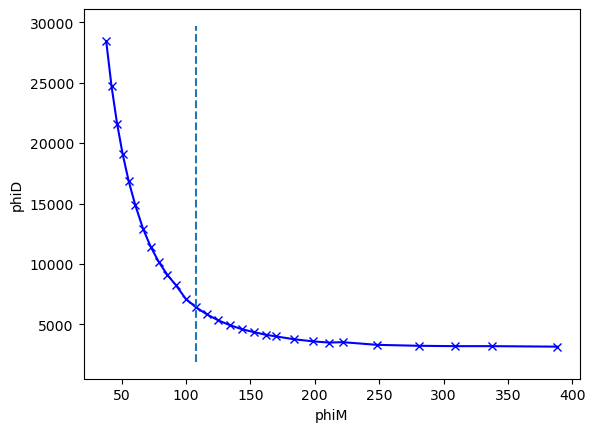

In [9]:
mgr.setMesh(mesh)


mgr.inv.setRegularization(3, limits=[0.1, 1.3], trans="log")
mgr.inv.setRegularization(4, limits=[0.1, 2.5], trans="log")
#mgr.inv.setRegularization(2)

lambdas = np.logspace(np.log10(1000), np.log10(1.93), num=29)
phiD = []
phiM = []
for lam in lambdas:
    mgr.invert(data, lam=lam, verbose=True)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())

phiD = np.array(phiD)
phiM = np.array(phiM)


from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, S=1.0, curve="convex", direction="decreasing",interp_method='interp1d')

print(round(kneedle.elbow, 3))
print(round(kneedle.knee_y, 3))
print(lambdas[np.where(phiM==kneedle.knee)[0]])
opt_lam = lambdas[np.where(phiM==kneedle.knee)[0]]

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')



21/02/25 - 16:34:28 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa_mike\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa_mike\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa_mike\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

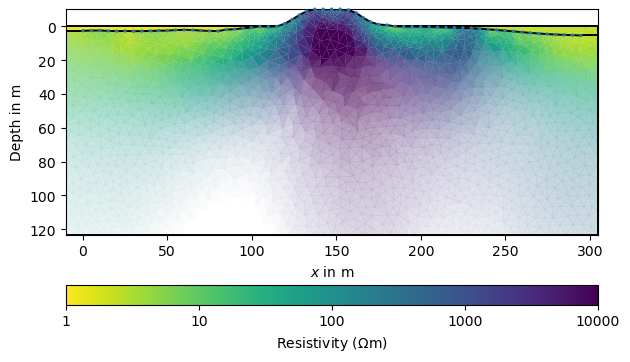

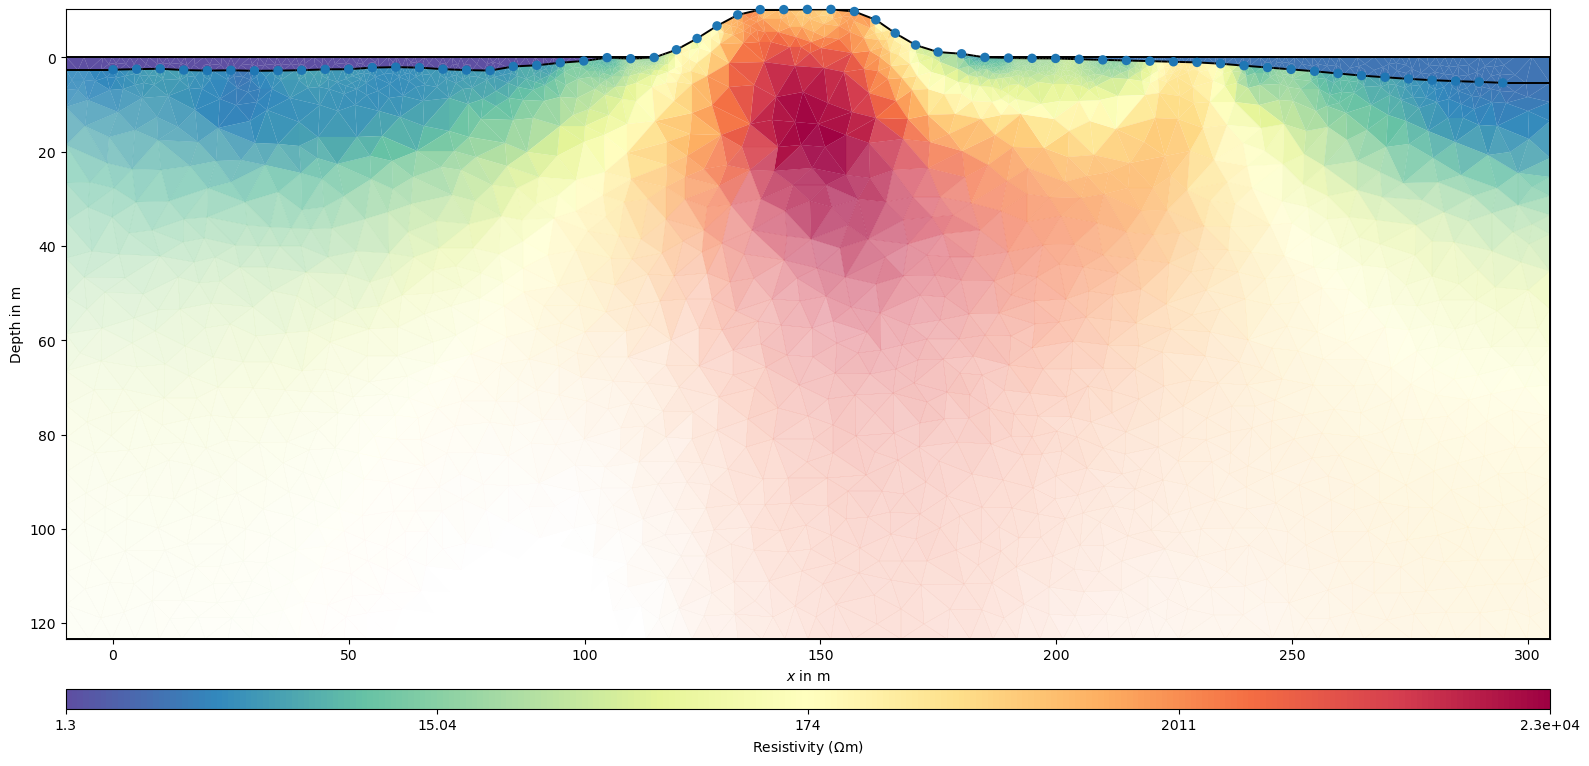

In [49]:
mgr.showResult(cMap="viridis_r", logScale=True, cMin=1, cMax=10000)
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_western_new_rhoa_mike')

In [50]:
with open(dir+'processing/shoreline/joined_west.pkl', 'rb') as f:
    joined_west = pickle.load(f)

In [51]:
westshore = joined_west[['year', 'xc', 'zc']].to_numpy()
westshore[:, 1] = westshore[:, 1].round(decimals=0)
westshore[:, 2] = westshore[:, 2].round(decimals=1)

In [52]:
posVec = [pg.Pos(pos) for pos in zip(westshore[:, 1], westshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))

fopDP = PriorModelling(para, posVec)

# Get the model values for all positions
resMesh = fopDP(mgr.model)
# Create a mesh and set cell markers
covMesh = fopDP(mgr.coverage())
#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out2 = np.column_stack((westshore[:, 1], westshore[:, 2], resMesh,  westshore[:, 0], covMesh))
out2 = np.c_[ out2, 2023 - out2[:, 3] ] 
out2

21/02/25 - 23:22:30 - pyGIMLi - INFO - Found 1 regions.


array([[ 2.61000000e+02, -3.80000000e+00,  8.57013820e+00,
         1.97000000e+03, -8.23064426e-01,  5.30000000e+01],
       [ 2.61000000e+02, -4.50000000e+00,  8.57013820e+00,
         1.97000000e+03, -8.23064426e-01,  5.30000000e+01],
       [ 2.61000000e+02, -5.30000000e+00,  8.58973082e+00,
         1.97000000e+03, -9.78850126e-01,  5.30000000e+01],
       ...,
       [ 1.73000000e+02, -4.04000000e+01,  9.31830219e+03,
         2.02300000e+03, -2.67508398e+00,  0.00000000e+00],
       [ 1.73000000e+02, -4.50000000e+01,  9.15367637e+03,
         2.02300000e+03, -2.71063955e+00,  0.00000000e+00],
       [ 1.73000000e+02, -5.01000000e+01,  8.06469365e+03,
         2.02300000e+03, -2.81980862e+00,  0.00000000e+00]])

In [53]:
posVec2 = [pg.Pos(pos) for pos in zip(westshore[:, 1], westshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))



fopDP = PriorModelling(para, posVec2)


resMesh = fopDP(mgr.model)



cov = fopDP(mgr.coverage())

west_shoreline_plots = np.column_stack((westshore[:, 1], westshore[:, 2], resMesh, westshore[:, 0], cov))
west_shoreline_plots = np.c_[ west_shoreline_plots, 2023 - west_shoreline_plots[:, 3] ]
column_titles = "X,Y,ResMesh,Year,Cov,Age"
np.savetxt(
    dir+'processing/shoreline/west_shoreline_plots.csv', 
    west_shoreline_plots, 
    delimiter=',', 
    header=column_titles, 
    comments=''  # Removes the '#' added to the header line by default
)

21/02/25 - 23:22:36 - pyGIMLi - INFO - Found 1 regions.


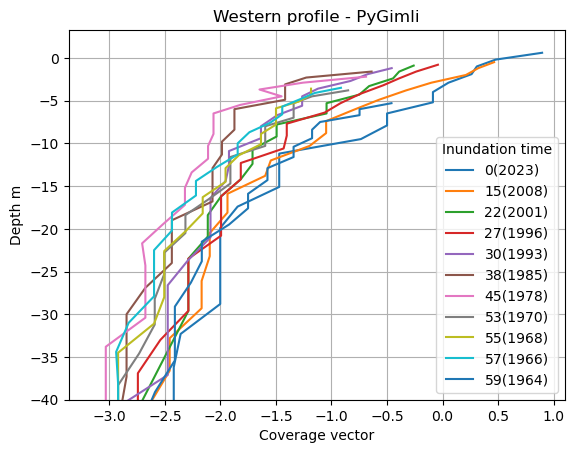

In [69]:
# Extracting unique years from the data
years = np.unique(out2[:, 5])

# Plotting each year's resistivity values with depth
for year in years:
    # Selecting data for the current year
    data_year = out2[out2[:, 5] == year]
    
    # Sorting the data based on depth
    data_year = data_year[data_year[:, 1].argsort()]
    
    # Plotting
    #plt.plot(data_year[:, 2], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')
    plt.plot(data_year[:, 4], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')

shorelines = np.unique(out2[:, 0])

combined_data = []

for year in years:
    # Get the rows corresponding to this shoreline from `out2`
    data_shoreline = out2[out2[:, 5] == year]
    
    # If there are multiple rows, take the first one for simplicity
    # (or you can decide on some other criteria)
    if data_shoreline.shape[0] > 0:
        selected_row = data_shoreline[0, :]  # selecting the first matching row

        # Create a row with shoreline and the corresponding values
        row = np.array([year, selected_row[0], selected_row[3]])
        combined_data.append(row)

# Convert list to a numpy array
combined_data = np.array(combined_data)
np.savetxt(dir+"pygimli/shorelines_gimli_western.csv", combined_data, delimiter=",", fmt="%d")

#shorelines = np.unique(out2[:, 0])
#np.savetxt(dir+"westshore.csv", shorelines, delimiter=",", fmt="%d")

# Adding labels and legend
plt.ylabel('Depth m')
plt.ylim(-40)
plt.xlabel('Coverage vector')
plt.title('Western profile - PyGimli')
plt.legend(title='Inundation time')
plt.grid(True)
plt.show()


143.774
4595.25
[28.11188004]


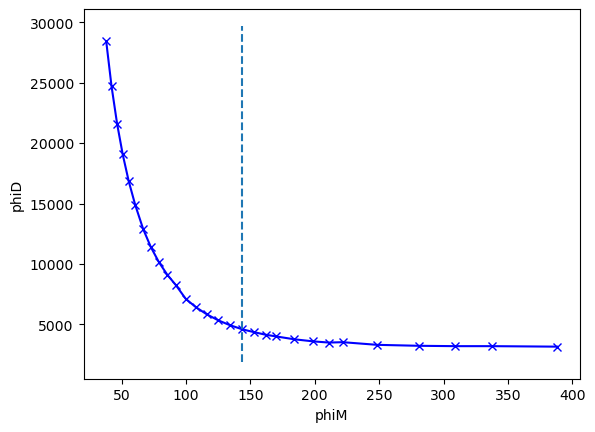

In [14]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=3)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas[np.where(phiM==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')



21/02/25 - 16:27:02 - pyGIMLi - INFO - Found 4 regions.
21/02/25 - 16:27:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/25 - 16:27:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/02/25 - 16:27:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/02/25 - 16:27:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 13969 Cells: 27040 Boundaries: 20728
21/02/25 - 16:27:03 - pyGIMLi - INFO - Use median(data values)=75.56398824013179
21/02/25 - 16:27:03 - pyGIMLi - INFO - Created startmodel from forward operator: 5953, min/max=75.563988/75.563988
21/02/25 - 16:27:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000189CF0BE390>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000189CF0BF0B0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000189C7AB19A0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000189F715DCB0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000189F715F680>
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  793.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  210.44 (dPhi = 73.14%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   43.53 (dPhi = 78.53%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    7.38 (dPhi = 74.91%) lam: 30.

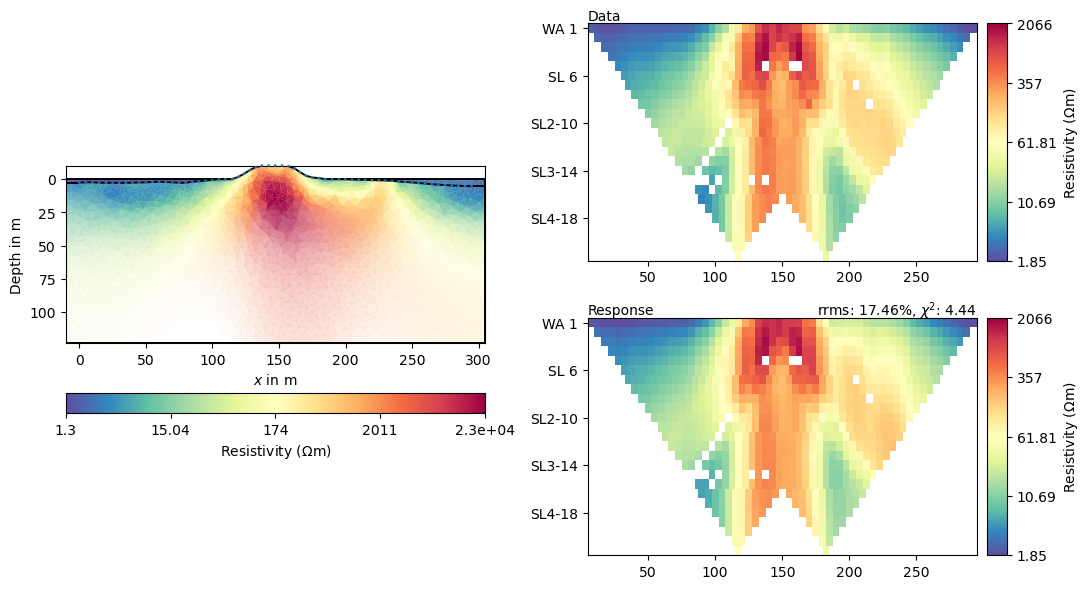

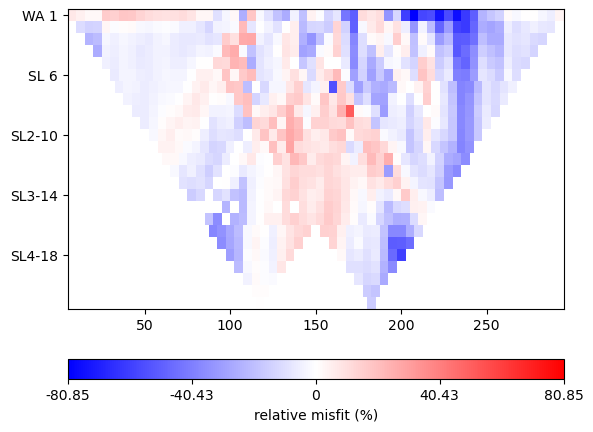

In [47]:
mgr.setMesh(mesh)


mgr.inv.setRegularization(3, limits=[0.1, 1.3], trans="log")
mgr.inv.setRegularization(4, limits=[0.1, 2.5], trans="log")
#mgr.inv.setRegularization(2, zWeight=0.9)


mgr.invert(lam=30, verbose=True)

mgr.showResultAndFit()
mgr.showMisfit()

11/05/25 - 18:26:03 - pyGIMLi - INFO - Found 2 regions.
11/05/25 - 18:26:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/05/25 - 18:26:03 - pyGIMLi - INFO - Found 2 regions.
11/05/25 - 18:26:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/05/25 - 18:26:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/05/25 - 18:26:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/05/25 - 18:26:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8349 Cells: 16248 Boundaries: 12410
11/05/25 - 18:26:04 - pyGIMLi - INFO - Use median(data values)=75.56429760254282
11/05/25 - 18:26:04 - pyGIMLi - INFO - Created startmodel from forward operator:3263, min/max=75.564298/75.564298
11/05/25 - 18:26:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001E76EDCD9E0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 1.85/2066
min/max (error): 2%/2.8e+04%
min/max (start model): 75.56/75.56
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  824.29
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  203.90 (dPhi = 74.88%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   47.96 (dPhi = 75.71%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.67 (dPhi = 75.28%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    6.66 (dPhi = 16.77%) lam: 30.0
---------------------------------------------

Text(154.63555335251493, 0.5, 'y (m)')

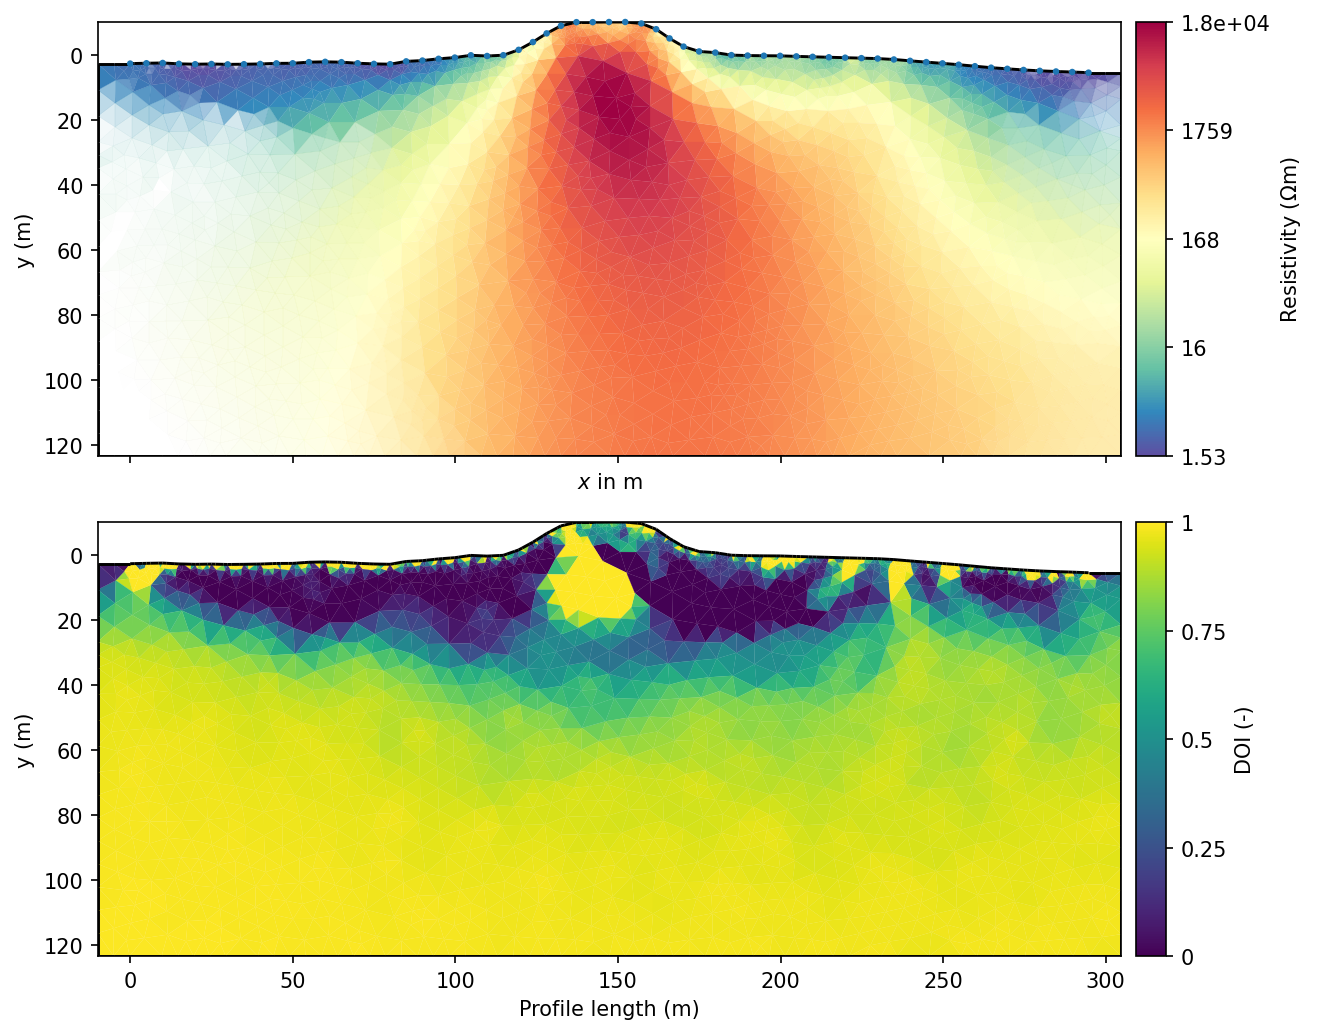

In [13]:
inv = mgr.invert(lam=30, verbose=True, paraDX=0.25, paraDZ=0.25, paraMaxCellSize=25)
def run_inv(referencemodel):
    # Set reference model as startmodel
    mgr.inv.inv.setModel(referencemodel)

    # Set reference model
    rm = mgr.inv.fop.regionManager()
    rm.setConstraintType(10) # 0 = reference model, 1 = first-order smoothing (default), 10 = both
    rm.fillConstraints(mgr.inv.fop.constraints())
    mgr.inv.inv.setReferenceModel(referencemodel)
    model = mgr.inv.inv.run()
    return model

def compute_DOI(ref1, ref2):
    m1 = run_inv(ref1)
    m2 = run_inv(ref2)

    R = (m1 - m2) / (m1r - m2r)
    return R


m1r = np.ones(mgr.paraDomain.cellCount()) * 19
m2r = np.ones(mgr.paraDomain.cellCount()) * 1900

DOI = compute_DOI(m1r, m2r)

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,7), dpi=150, sharex=True)

mgr.showResult(ax=ax1, orientation="vertical")
#ax1.set_xlabel("Profile length")
ax1.set_ylabel("y (m)")
pg.show(mgr.paraDomain, DOI, ax=ax2, cMin=0, cMax=1, orientation="vertical", label="DOI (-)")
ax2.set_xlabel("Profile length (m)")
ax2.set_ylabel("y (m)")


C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35888\3554076232.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


Text(109.08333333333333, 0.5, 'Relative Elevation (m)')

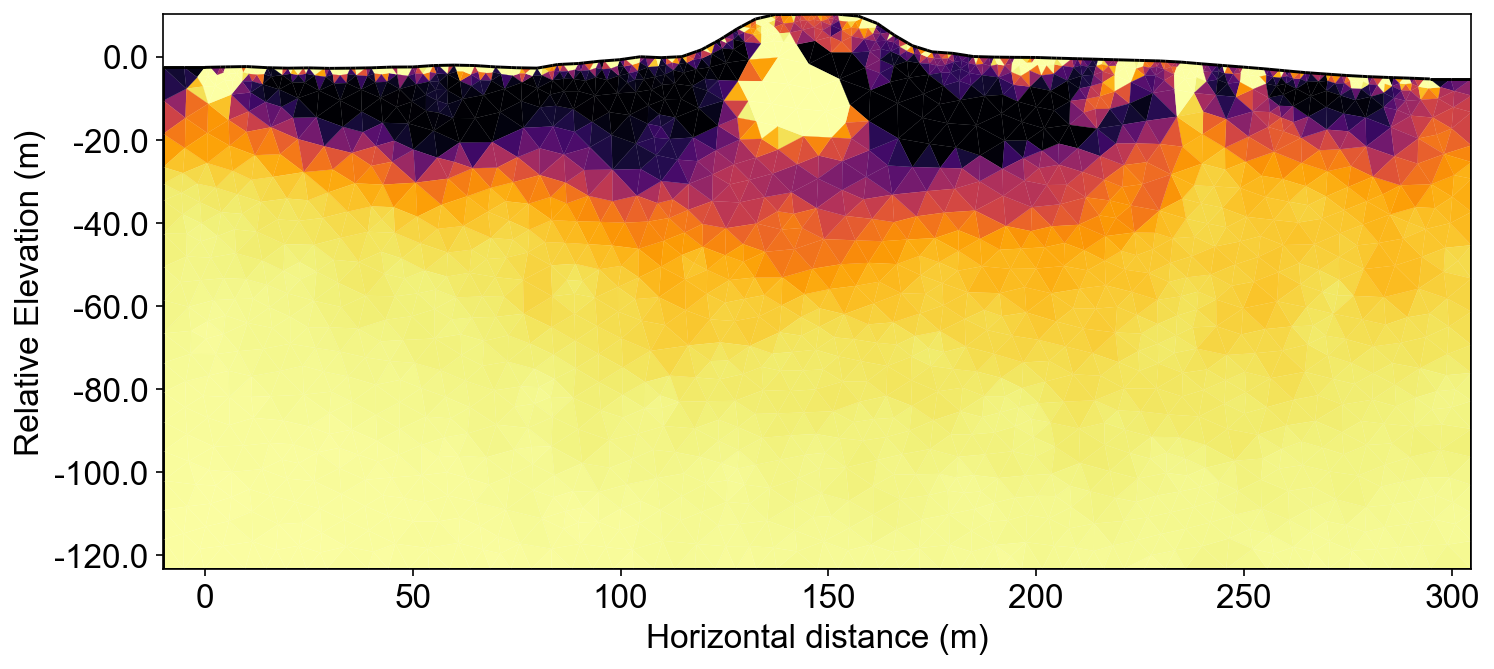

In [19]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,5), dpi=150, sharex=True)
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
mgr.showResult(ax=ax1, orientation="vertical")
#ax1.set_xlabel("Profile length")
#ax1.set_ylabel("y (m)")
pg.show(mgr.paraDomain, DOI, ax=ax, cMin=0, cMax=1, orientation="vertical", label="DOI", cMap='inferno', colorBar=False)
ax.set_xlabel("Horizontal distance (m)")
ax.set_ylabel("y (m)")
current_ticks = ax.get_yticks()
relative_ticks = current_ticks   # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation

ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax.set_ylabel("Relative Elevation (m)", fontsize=16)

In [23]:
mesh = mgr.paraDomain
mesh["DOI"] = DOI


mesh.exportVTK(dir+'pygimli/all_inversions/west_amph_DOI.vtk')

Text(87.33333333333333, 0.5, 'y (m)')

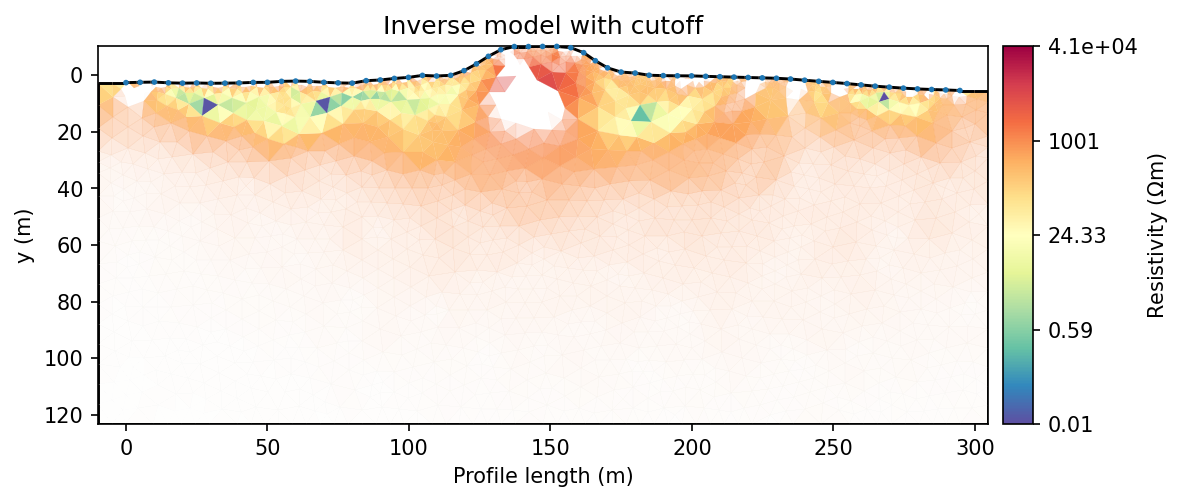

In [26]:
import numpy as np

def doi_to_transparency(doi, doiThreshold=0.2, maxDOI=1.0):
    """
    Convert DOI values into transparency values for visualization.

    Parameters:
        doi (array-like): DOI values.
        doiThreshold (float): DOI value below which transparency is 1 (fully opaque).
        maxDOI (float): DOI value at which transparency is 0 (fully transparent).

    Returns:
        array-like: Transparency values (1 = opaque, 0 = fully transparent).
    """
    D = np.asarray(doi)
    
    # Initialize alpha (transparency) array
    alpha = np.ones_like(D)  # Default to fully opaque

    # Apply gradual transparency beyond the DOI threshold
    mask = D > doiThreshold
    alpha[mask] = 1.0 - (D[mask] - doiThreshold) / (maxDOI - doiThreshold)

    # Cap values to ensure transparency is within [0,1]
    alpha = np.clip(alpha, 0, 1)
    
    return alpha



#opacity = np.ones(mgr.paraDomain.cellCount())
#opacity[DOI > 0.2] = 0
opacity = doi_to_transparency(DOI)
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=150)
mgr.showResult(ax=ax, coverage=opacity, orientation = "vertical")
ax.set_title("Inverse model with cutoff")
ax.set_xlabel("Profile length (m)")
ax.set_ylabel("y (m)")

In [1]:
opacity = np.ones(mgr.paraDomain.cellCount())
opacity[DOI > 0.5] = 0
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=150)
mgr.showResult(ax=ax, coverage=opacity, orientation = "vertical")
ax.set_title("Inverse model with cutoff")
ax.set_xlabel("Profile length (m)")
ax.set_ylabel("y (m)")

NameError: name 'np' is not defined

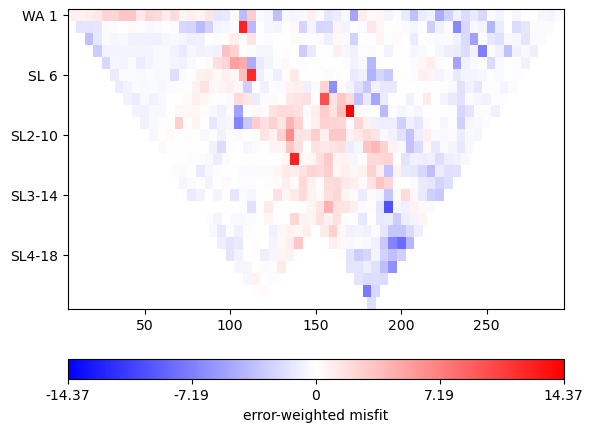

In [48]:
mgr.showMisfit(errorWeighted=True)